# Risk prediction for Coronary Heart Disease using Artificial Intelligence Approaches

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#cleaning">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#machinelearning">Machine Learning</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

For this project, I used the [2019 BRFSS Survey Dataset](https://www.cdc.gov/brfss/annual_data/2019/files/LLCP2019XPT.zip) provided by the [Centers for Disease Control and Prevention](https://www.cdc.gov/brfss/annual_data/annual_2019.html). This dataset collects information on risk behaviours linked to chronic and preventable infectious diseases in the adult population in the United States. This project focuses on **predicting coronary heart disease risk (CHD).** and I will be implementing Artificial intelligence approaches.

In [ ]:
#Installing all required libraries
!pip install pandas numpy dataframe_image seaborn

In [9]:
#importing required libraries
import pandas as pd
import numpy as np
from numpy.random import permutation

import dataframe_image as dfi
import zipfile
from zipfile import ZipFile

import seaborn as sns
import matplotlib.pyplot as plt

from urllib import request
import warnings

In [10]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
warnings.filterwarnings('ignore')
%matplotlib inline

In [11]:
def getFile(url):
    '''Downloads and saves the dataset in current directory'''
    # Define the remote file to retrieve
    remote_url = url
    # Define the local filename to save data
    local_file = 'LLCP2019XPT.zip'
    # Download the file and save locally
    request.urlretrieve(remote_url, local_file)
    print('File is downloaded')

In [12]:
def readFile(file):
    '''A function that would read in the dataset from the zipped archive'''
    zf = zipfile.ZipFile(file)
    df = pd.read_sas(zf.open(zipfile.ZipFile.namelist(zf)[0]), format='xport')
    print('Dataset extracted')
    return df
    

### Download and Read Dataset

In [13]:
%%time
#Unzips and reads the dataset - Would take about 2 minutes!
getFile('https://www.cdc.gov/brfss/annual_data/2019/files/LLCP2019XPT.zip')
dataset = readFile('LLCP2019XPT.zip')

File is downloaded
CPU times: total: 1min 33s
Wall time: 1min 42s


In [14]:
#Returns a tuple representing the dimensionality of the dataset
dataset.shape

(418268, 342)

In [27]:
#Reducing the dataset to access the features/columns needed
selected_dataset = dataset[['_MICHD', '_SEX', '_AGEG5YR', '_RACE', 'MARITAL', '_EDUCAG', 'EMPLOY1', 
                'INCOME2', '_BMI5CAT','GENHLTH', 'PHYSHLTH', 'MENTHLTH', 'CHECKUP1', 
                'HLTHPLN1', '_TOTINDA', '_FRTLT1A', '_VEGLT1A', '_RFHYPE5','TOLDHI2',
                'DIABETE4', 'CHCSCNCR', 'CHCOCNCR', 'CVDSTRK3', 'ASTHMA3','CHCCOPD2', 
                'HAVARTH4', 'CHCKDNY2', 'DIFFWALK', '_SMOKER3', '_RFDRHV7']]

#To see the first 5 rows of the dataset
selected_dataset.head()

,_MICHD,_SEX,_AGEG5YR,_RACE,MARITAL,_EDUCAG,EMPLOY1,INCOME2,_BMI5CAT,GENHLTH,PHYSHLTH,MENTHLTH,CHECKUP1,HLTHPLN1,_TOTINDA,_FRTLT1A,_VEGLT1A,_RFHYPE5,TOLDHI2,DIABETE4,CHCSCNCR,CHCOCNCR,CVDSTRK3,ASTHMA3,CHCCOPD2,HAVARTH4,CHCKDNY2,DIFFWALK,_SMOKER3,_RFDRHV7
0,2.0,2.0,13.0,2.0,2.0,1.0,7.0,3.0,3.0,3.0,15.0,88.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,3.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,3.0,1.0
1,2.0,2.0,11.0,1.0,1.0,3.0,7.0,5.0,2.0,4.0,10.0,88.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,4.0,1.0
2,2.0,2.0,10.0,2.0,3.0,4.0,7.0,7.0,4.0,3.0,88.0,30.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,4.0,1.0
3,2.0,2.0,13.0,1.0,3.0,3.0,7.0,6.0,2.0,4.0,30.0,88.0,1.0,1.0,9.0,9.0,9.0,2.0,2.0,3.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,NaN,9.0,9.0
4,2.0,2.0,13.0,1.0,1.0,3.0,5.0,99.0,2.0,2.0,88.0,88.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,1.0


<a id='wrangling'></a>
## Data Wrangling

In this section, I explored the data completeness and tidiness, basic statistics and understood the data distribution before analysis.

In [67]:
#Returns a tuple representing the dimensionality of the reduced dataset
selected_dataset.shape

(353578, 30)

There are 353,578 respondents with 30 respondent attributes (including the predictor variable)

In [73]:
selected_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353578 entries, 0 to 353577
Data columns (total 30 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   _MICHD    353578 non-null  float64
 1   _SEX      353578 non-null  float64
 2   _AGEG5YR  353578 non-null  float64
 3   _RACE     353578 non-null  float64
 4   MARITAL   353578 non-null  float64
 5   _EDUCAG   353578 non-null  float64
 6   EMPLOY1   353578 non-null  float64
 7   INCOME2   353578 non-null  float64
 8   _BMI5CAT  353578 non-null  float64
 9   GENHLTH   353578 non-null  float64
 10  PHYSHLTH  353578 non-null  float64
 11  MENTHLTH  353578 non-null  float64
 12  CHECKUP1  353578 non-null  float64
 13  HLTHPLN1  353578 non-null  float64
 14  _TOTINDA  353578 non-null  float64
 15  _FRTLT1A  353578 non-null  float64
 16  _VEGLT1A  353578 non-null  float64
 17  _RFHYPE5  353578 non-null  float64
 18  TOLDHI2   353578 non-null  float64
 19  DIABETE4  353578 non-null  float64
 20  CHCS

The above result shows that there are no null values in the dataset. It is also clear that most of these values are floating point numbers and are mainly categorical.

In [78]:
selected_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
_MICHD,353578.0,0.095402,0.293770,0.0,0.0,0.0,0.0,1.0
_SEX,353578.0,0.464124,0.498712,0.0,0.0,0.0,1.0,1.0
_AGEG5YR,353578.0,8.018533,3.501780,1.0,5.0,9.0,11.0,14.0
_RACE,353578.0,2.048581,2.295750,1.0,1.0,1.0,1.0,9.0
MARITAL,353578.0,2.271756,1.675716,1.0,1.0,1.0,3.0,9.0
_EDUCAG,353578.0,3.016494,0.992435,1.0,2.0,3.0,4.0,9.0
EMPLOY1,353578.0,3.997571,2.889971,1.0,1.0,3.0,7.0,9.0
INCOME2,353578.0,18.816340,30.298947,1.0,5.0,7.0,8.0,99.0
_BMI5CAT,353578.0,2.998097,0.830655,1.0,2.0,3.0,4.0,4.0
GENHLTH,353578.0,2.616399,1.098299,1.0,2.0,3.0,3.0,9.0


<a id='#cleaning'></a>
## Data Cleaning

At this point, I cleaned the data, re-encoded some variables to familiar binary outcomes (1.0 and 0.0), renamed columns to more user friendly names to aid data visualisation. I also handled the data imbalance by making both class labels have equal distributions.

In [74]:
def dataClean(data):
    '''DATA CLEANING AND PREPROCESSING
    Dropped null and incomplete records,
    Renamed columns to user friendly names,
    '''
    #Filtering out instances where the respondents answered 'they did not know'
    #Re-encoded variables - changed to 1 and 0 (where applicable)
    
    #_MICHD
    data['_MICHD'] = data['_MICHD'].replace([2.0], 0.0)
    #Sex
    data['_SEX'] = data['_SEX'].replace({2.0: 0.0})
    #Age
    data = data[data['_AGEG5YR'] != 14.0]
    #Race
    data = data[data._RACE != 9.0]
    #Marital
    data = data[data.MARITAL != 9.0]
    #Education
    data = data[data._EDUCAG != 9.0]
    #Employ
    data = data[data.EMPLOY1 != 9.0]
    #Income
    data = data[data.INCOME2 != 77.0]
    data = data[data.INCOME2 != 99.0]
    #Genhlth
    data = data[data.GENHLTH != 7.0]
    data = data[data.GENHLTH != 9.0]
    #Physhlth
    data['PHYSHLTH'] = data['PHYSHLTH'].replace([88.0], 0.0)
    data = data[data.PHYSHLTH != 77.0]
    data = data[data.PHYSHLTH != 99.0]
    #Menthlth
    data['MENTHLTH'] = data['MENTHLTH'].replace([88.0], 0.0)
    data = data[data.MENTHLTH != 77.0]
    data = data[data.MENTHLTH != 99.0]
    #HLTHPLN1
    data['HLTHPLN1'] = data['HLTHPLN1'].replace([2.0], 0.0)
    data = data[data.HLTHPLN1 != 7.0]
    data = data[data.HLTHPLN1 != 9.0]
    #CHECKUP1
    data = data[data.CHECKUP1 != 7.0]
    data = data[data.CHECKUP1 != 9.0]
    #_TOTINDA
    data['_TOTINDA'] = data['_TOTINDA'].replace([2.0], 0.0)
    data = data[data._TOTINDA != 9.0]
    #CVDSTRK3
    data['CVDSTRK3'] = data['CVDSTRK3'].replace([2.0], 0.0)
    data = data[data.CVDSTRK3 != 7.0]
    data = data[data.CVDSTRK3 != 9.0]
    #Diabetes
    data['DIABETE4'] = data['DIABETE4'].replace([2.0], 3.0)
    data['DIABETE4'] = data['DIABETE4'].replace({3.0: 0.0, 4.0:2.0})
    data = data[data.DIABETE4 != 7.0]
    data = data[data.DIABETE4 != 9.0]
    #ASTHMA3
    data['ASTHMA3'] = data['ASTHMA3'].replace([2.0], 0.0)
    data = data[data.ASTHMA3 != 7.0]
    data = data[data.ASTHMA3 != 9.0]
    #CHCSCNCR
    data['CHCSCNCR'] = data['CHCSCNCR'].replace([2.0], 0.0)
    data = data[data.CHCSCNCR != 7.0]
    data = data[data.CHCSCNCR != 9.0]
    #CHCOCNCR
    data['CHCOCNCR'] = data['CHCOCNCR'].replace([2.0], 0.0)
    data = data[data.CHCOCNCR != 7.0]
    data = data[data.CHCOCNCR != 9.0]
    #CHCCOPD2
    data['CHCCOPD2'] = data['CHCCOPD2'].replace([2.0], 0.0)
    data = data[data.CHCCOPD2 != 7.0]
    data = data[data.CHCCOPD2 != 9.0]
    #HAVARTH4
    data['HAVARTH4'] = data['HAVARTH4'].replace([2.0], 0.0)
    data = data[data.HAVARTH4 != 7.0]
    data = data[data.HAVARTH4 != 9.0]
    #CHCKDNY2
    data['CHCKDNY2'] = data['CHCKDNY2'].replace([2.0], 0.0)
    data = data[data.CHCKDNY2 != 7.0]
    data = data[data.CHCKDNY2 != 9.0]
    #DIFFWALK
    data['DIFFWALK'] = data['DIFFWALK'].replace([2.0], 0.0)
    data = data[data.DIFFWALK != 7.0]
    data = data[data.DIFFWALK != 9.0]
    #_SMOKER3
    data = data[data._SMOKER3 != 9.0]
    #_RFDRHV7
    data['_RFDRHV7'] = data['_RFDRHV7'].replace([2.0], 0.0)
    data = data[data._RFDRHV7 != 9.0]
    #_FRTLT1A
    data['_FRTLT1A'] = data['_FRTLT1A'].replace([2.0], 0.0)
    data = data[data._FRTLT1A != 9.0]
    #_VEGLT1A
    data['_VEGLT1A'] = data['_VEGLT1A'].replace([2.0], 0.0)
    data = data[data._VEGLT1A != 9.0]
    #_RFHYPE5
    data['_RFHYPE5'] = data['_RFHYPE5'].replace({2.0:1.0, 1.0:0.0})
    data = data[data._RFHYPE5 != 9.0]
    #TOLDHI2
    data['TOLDHI2'] = data['TOLDHI2'].replace([2.0], 0.0)
    data = data[data.TOLDHI2 != 7.0]
    data = data[data.TOLDHI2 != 9.0]

    #Renaming Columns    
    col_rename = {'_MICHD': 'heartDiseaseAttack',
                 '_SEX': 'sex',
                 '_AGEG5YR': 'age',
                 '_RACE': 'race',
                 'MARITAL': 'marital',
                 '_EDUCAG': 'education',
                 'EMPLOY1': 'employment',
                 'INCOME2': 'income',
                 '_BMI5CAT': 'BMI',
                 'GENHLTH': 'GENHLTH'.lower(),
                 'PHYSHLTH': 'PHYSHLTH'.lower(),
                 'MENTHLTH': 'MENTHLTH'.lower(),
                 'HLTHPLN1': 'healthCare',
                 'CHECKUP1': 'lastCheckup',
                 '_TOTINDA': 'physicalActivity',
                 '_FRTLT1A': 'fruits',
                 '_VEGLT1A': 'vegetables',
                 '_RFHYPE5': 'bloodPressure',
                 'TOLDHI2': 'cholesterol',
                 'DIABETE4': 'diabetes',
                 'CVDSTRK3': 'stroke',
                 'ASTHMA3': 'asthma', 
                 'CHCSCNCR': 'skinCancer',
                 'CHCOCNCR': 'otherCancer',
                 'CHCCOPD2': 'COPD',
                 'HAVARTH4': 'arthritis',
                 'CHCKDNY2': 'kidneyDisease',
                 'DIFFWALK': 'DIFFWALK'.lower(),
                 '_SMOKER3': 'smoker',
                 '_RFDRHV7': 'alcohol'}

    data = data.rename(columns = col_rename)
    data.reset_index(drop=True, inplace=True)
    
    
    #Handling data imbalance by taking random equal samples of the lesser class (1)
    
    #Separate the 0(No HeartDisease) and 1(HeartDisease)
    #Get the 1s
    is1 = data['heartDiseaseAttack'] == 1.0
    data1 = data[is1]

    #Get the 0s
    is0 = data['heartDiseaseAttack'] == 0.0
    data0 = data[is0]

    data_rand0 = data0.take(np.random.permutation(len(data0))[:21911])

    datasets = [data1, data_rand0]

    data = pd.concat(datasets, ignore_index=True)

    return data

In [75]:
cleaned_dataset = dataClean(selected_dataset)

In [80]:
cleaned_dataset.head()

,heartDiseaseAttack,sex,age,race,marital,education,employment,income,BMI,genhlth,physhlth,menthlth,lastCheckup,healthCare,physicalActivity,fruits,vegetables,bloodPressure,cholesterol,diabetes,skinCancer,otherCancer,stroke,asthma,COPD,arthritis,kidneyDisease,diffwalk,smoker,alcohol
0,1.0,1.0,13.0,1.0,3.0,4.0,7.0,5.0,4.0,3.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,4.0,1.0
1,1.0,0.0,10.0,1.0,1.0,1.0,8.0,2.0,1.0,5.0,30.0,5.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
2,1.0,0.0,11.0,1.0,1.0,3.0,2.0,8.0,4.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,1.0
3,1.0,0.0,12.0,1.0,3.0,3.0,8.0,8.0,3.0,4.0,5.0,2.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,4.0,1.0
4,1.0,1.0,12.0,1.0,1.0,3.0,7.0,7.0,3.0,3.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,3.0,1.0


In [77]:
#Dependent variable distribution
cleaned_dataset['heartDiseaseAttack'].value_counts()

1.0    21911
0.0    21911
Name: heartDiseaseAttack, dtype: int64

The target variable is now balanced. Respondents that reported having coronary heart disease and those that did not are both 21,911

<a id='eda'></a>
## Exploratory Data Analysis/Data Visualisation

In this section, I explored the independent variables in relation to the dependent. That is, all respoondent attributes and the overall distribution in relation to Coronary Heart Disease (heartDiseaseAttack). 

In [90]:
#Creating a copy of the dataset for visualisation 
visual_dataset = cleaned_dataset.copy()

In [91]:
#data_viz.to_csv('heartdisease_balanced.csv', index=False)

In [92]:
visual_dataset.head()

,heartDiseaseAttack,sex,age,race,marital,education,employment,income,BMI,genhlth,physhlth,menthlth,lastCheckup,healthCare,physicalActivity,fruits,vegetables,bloodPressure,cholesterol,diabetes,skinCancer,otherCancer,stroke,asthma,COPD,arthritis,kidneyDisease,diffwalk,smoker,alcohol
0,1.0,1.0,13.0,1.0,3.0,4.0,7.0,5.0,4.0,3.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,4.0,1.0
1,1.0,0.0,10.0,1.0,1.0,1.0,8.0,2.0,1.0,5.0,30.0,5.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
2,1.0,0.0,11.0,1.0,1.0,3.0,2.0,8.0,4.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,1.0
3,1.0,0.0,12.0,1.0,3.0,3.0,8.0,8.0,3.0,4.0,5.0,2.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,4.0,1.0
4,1.0,1.0,12.0,1.0,1.0,3.0,7.0,7.0,3.0,3.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,3.0,1.0


### Converting records into human readable versions for visualisation

In [93]:
def visual(data_viz):
    '''Takes in a dataset with numeric categorical records and returns real life representations'''
    #
    data_viz['heartDiseaseAttack'] = data_viz['heartDiseaseAttack'].apply(lambda x : 'Yes' if x == 1.0 else 'No')
    #sex
    data_viz['sex'] = data_viz['sex'].apply(lambda x : 'Male' if x == 1.0 else 'Female')
    def agebins(x):
        if x == 1.0 or x == 2.0:
            return '18-29'
        elif x == 3.0 or x == 4.0:
            return '30-39'
        elif x == 5.0 or x == 6.0:
            return '40-49'
        elif x == 7.0 or x == 8.0:
            return '50-59'
        elif x == 9.0 or x == 10.0:
            return '60-69'
        else:
            return '70 or Older'
    #age
    data_viz['age'] = data_viz['age'].apply(lambda x: agebins(x))
    #race
    data_viz['race'].replace({1.0:'White', 2.0:'Black', 3.0:'American Indian or Alaskan Native', 4.0:'Asian',
                          5.0:'Native Hawaiian or other Pacific Islander', 6.0:'Other race', 7.0:'Multiracial',
                          8.0:'Hispanic'}, inplace=True)
    #marital
    data_viz['marital'].replace({1.0:'Married', 2.0:'Divorced', 3.0:'Widowed', 4.0:'Separated',
                             5.0:'Never Married', 6.0:'Unmarried Couple'}, inplace=True)
    #education
    data_viz['education'].replace({1.0:'Did not graduate High School', 2.0:'Graduated High School',
                               3.0:'Attended College', 4.0:'Graduated from College'}, inplace=True)
    #employment
    data_viz['employment'].replace({1.0:'Employed', 2.0:'Self-employed', 3.0:'No work > 1y',
                                      4.0:'No work < 1y', 5.0:'Homemaker', 6.0:'Student',
                                      7.0: 'Retired', 8.0:'Unable to work'}, inplace=True)
    #income
    data_viz['income'].replace({1.0:'< $10 K', 2.0:'$10–$15 K', 3.0:'$15–$20 K',
                            4.0:'$20–$25 K', 5.0:'$25–$35 K', 6.0:'$35–$50 K',
                            7.0: '$50–$75 K', 8.0:'> $75 K'}, inplace=True)
    #BMI
    data_viz['BMI'].replace({1.0:'Underweight', 2.0:'Normal Weight', 3.0:'Overweight', 4.0:'Obese'}, inplace=True)
    
    #genhlth
    data_viz['genhlth'].replace({1.0:'Excellent', 2.0:'Very good', 3.0:'Good', 4.0:'Fair', 5.0:'Poor'}, inplace=True)
    
    def physbins(x):
        if x <= 7.0:
            return '7 or Less'
        else:
            return 'More than 7'
        
    #physhlth
    data_viz['physhlth'] = data_viz['physhlth'].apply(lambda x: physbins(x))
    
    def mentbins(x):
        if x <= 7.0:
            return '7 or Less'
        else:
            return 'More than 7'
        
    #menthlth
    data_viz['menthlth'] = data_viz['menthlth'].apply(lambda x: mentbins(x))
    
    #healthcare
    data_viz['healthCare'] = data_viz['healthCare'].apply(lambda x : 'Yes' if x == 1.0 else 'No') 
    
    data_viz['lastCheckup'].replace({1.0:'<1 y', 2.0:'1–2 y', 3.0:'3–5 y', 4.0:'>5', 8.0:'Never'}, inplace=True)
    
    data_viz['physicalActivity'] = data_viz['physicalActivity'].apply(lambda x : 'Yes' if x == 1.0 else 'No')
    
    data_viz['fruits'] = data_viz['fruits'].apply(lambda x : 'Yes' if x == 1.0 else 'No')
    
    data_viz['vegetables'] = data_viz['vegetables'].apply(lambda x : 'Yes' if x == 1.0 else 'No')

    data_viz['bloodPressure'] = data_viz['bloodPressure'].apply(lambda x : 'Yes' if x == 1.0 else 'No')

    data_viz['cholesterol'] = data_viz['cholesterol'].apply(lambda x : 'Yes' if x == 1.0 else 'No')

    data_viz['diabetes'] = data_viz['diabetes'].apply(lambda x : 'Yes' if x == 1.0 else 'No') 

    data_viz['stroke'] = data_viz['stroke'].apply(lambda x : 'Yes' if x == 1.0 else 'No')

    data_viz['asthma'] = data_viz['asthma'].apply(lambda x : 'Yes' if x == 1.0 else 'No')

    data_viz['skinCancer'] = data_viz['skinCancer'].apply(lambda x : 'Yes' if x == 1.0 else 'No')

    data_viz['otherCancer'] = data_viz['otherCancer'].apply(lambda x : 'Yes' if x == 1.0 else 'No')

    data_viz['COPD'] = data_viz['COPD'].apply(lambda x : 'Yes' if x == 1.0 else 'No')

    data_viz['arthritis'] = data_viz['arthritis'].apply(lambda x : 'Yes' if x == 1.0 else 'No')

    data_viz['kidneyDisease'] = data_viz['kidneyDisease'].apply(lambda x : 'Yes' if x == 1.0 else 'No')

    data_viz['diffwalk'] = data_viz['diffwalk'].apply(lambda x : 'Yes' if x == 1.0 else 'No')

    data_viz['smoker'].replace({1.0:'Current smoker every day', 2.0:'Current smoker some days',
                                3.0:'Former smoker', 4.0:'Never smoked'}, inplace=True)

    data_viz['alcohol'] = data_viz['alcohol'].apply(lambda x : 'Yes' if x == 1.0 else 'No')
    
    return data_viz

In [94]:
#Call function to transform dataset for visualisation
df = visual(visual_dataset)

#preview the dataset
df.head()

,heartDiseaseAttack,sex,age,race,marital,education,employment,income,BMI,genhlth,physhlth,menthlth,lastCheckup,healthCare,physicalActivity,fruits,vegetables,bloodPressure,cholesterol,diabetes,skinCancer,otherCancer,stroke,asthma,COPD,arthritis,kidneyDisease,diffwalk,smoker,alcohol
0,Yes,Male,70 or Older,White,Widowed,Graduated from College,Retired,$25–$35 K,Obese,Good,7 or Less,7 or Less,<1 y,Yes,No,Yes,Yes,Yes,No,No,No,No,No,Yes,No,Yes,No,Yes,Never smoked,Yes
1,Yes,Female,60-69,White,Married,Did not graduate High School,Unable to work,$10–$15 K,Underweight,Poor,More than 7,7 or Less,<1 y,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Current smoker every day,Yes
2,Yes,Female,70 or Older,White,Married,Attended College,Self-employed,> $75 K,Obese,Very good,7 or Less,7 or Less,<1 y,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,No,No,Yes,No,No,Never smoked,Yes
3,Yes,Female,70 or Older,White,Widowed,Attended College,Unable to work,> $75 K,Overweight,Fair,7 or Less,7 or Less,<1 y,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,No,No,Yes,Yes,Never smoked,Yes
4,Yes,Male,70 or Older,White,Married,Attended College,Retired,$50–$75 K,Overweight,Good,7 or Less,7 or Less,<1 y,Yes,Yes,No,Yes,Yes,Yes,Yes,No,No,No,No,Yes,Yes,Yes,No,Former smoker,Yes


In [95]:
df.describe().T

,count,unique,top,freq
heartDiseaseAttack,43822,2,Yes,21911
sex,43822,2,Male,23109
age,43822,6,70 or Older,15680
race,43822,8,White,34831
marital,43822,6,Married,23011
education,43822,4,Graduated from College,16598
employment,43822,8,Retired,18187
income,43822,8,> $75 K,13519
BMI,43822,4,Obese,16230
genhlth,43822,5,Good,13957


#### A few observations
* There are more males than female respondents
* Most people are aged 70+
* White is the dominant race
* Most respondents are married
* Most the respondents graduated from college
* The dataset contains more respondents that have retired, which makes sense considering most are above 70
* Almost half of the respondents earn above 75k annually
* Judging by their BMIs, almost half are considered obese!
* People that considered themselves to have a good physical health are more popular
* Most respondents suffered from mental health struggles
* The majority of people reported high blood pressure and high cholesterol
* Most people had never smoked before
* Diabetic patients were few

I will now investigate by visualising to find correlations between each individual risk factor and the dependent heart disease variable in the dataset.

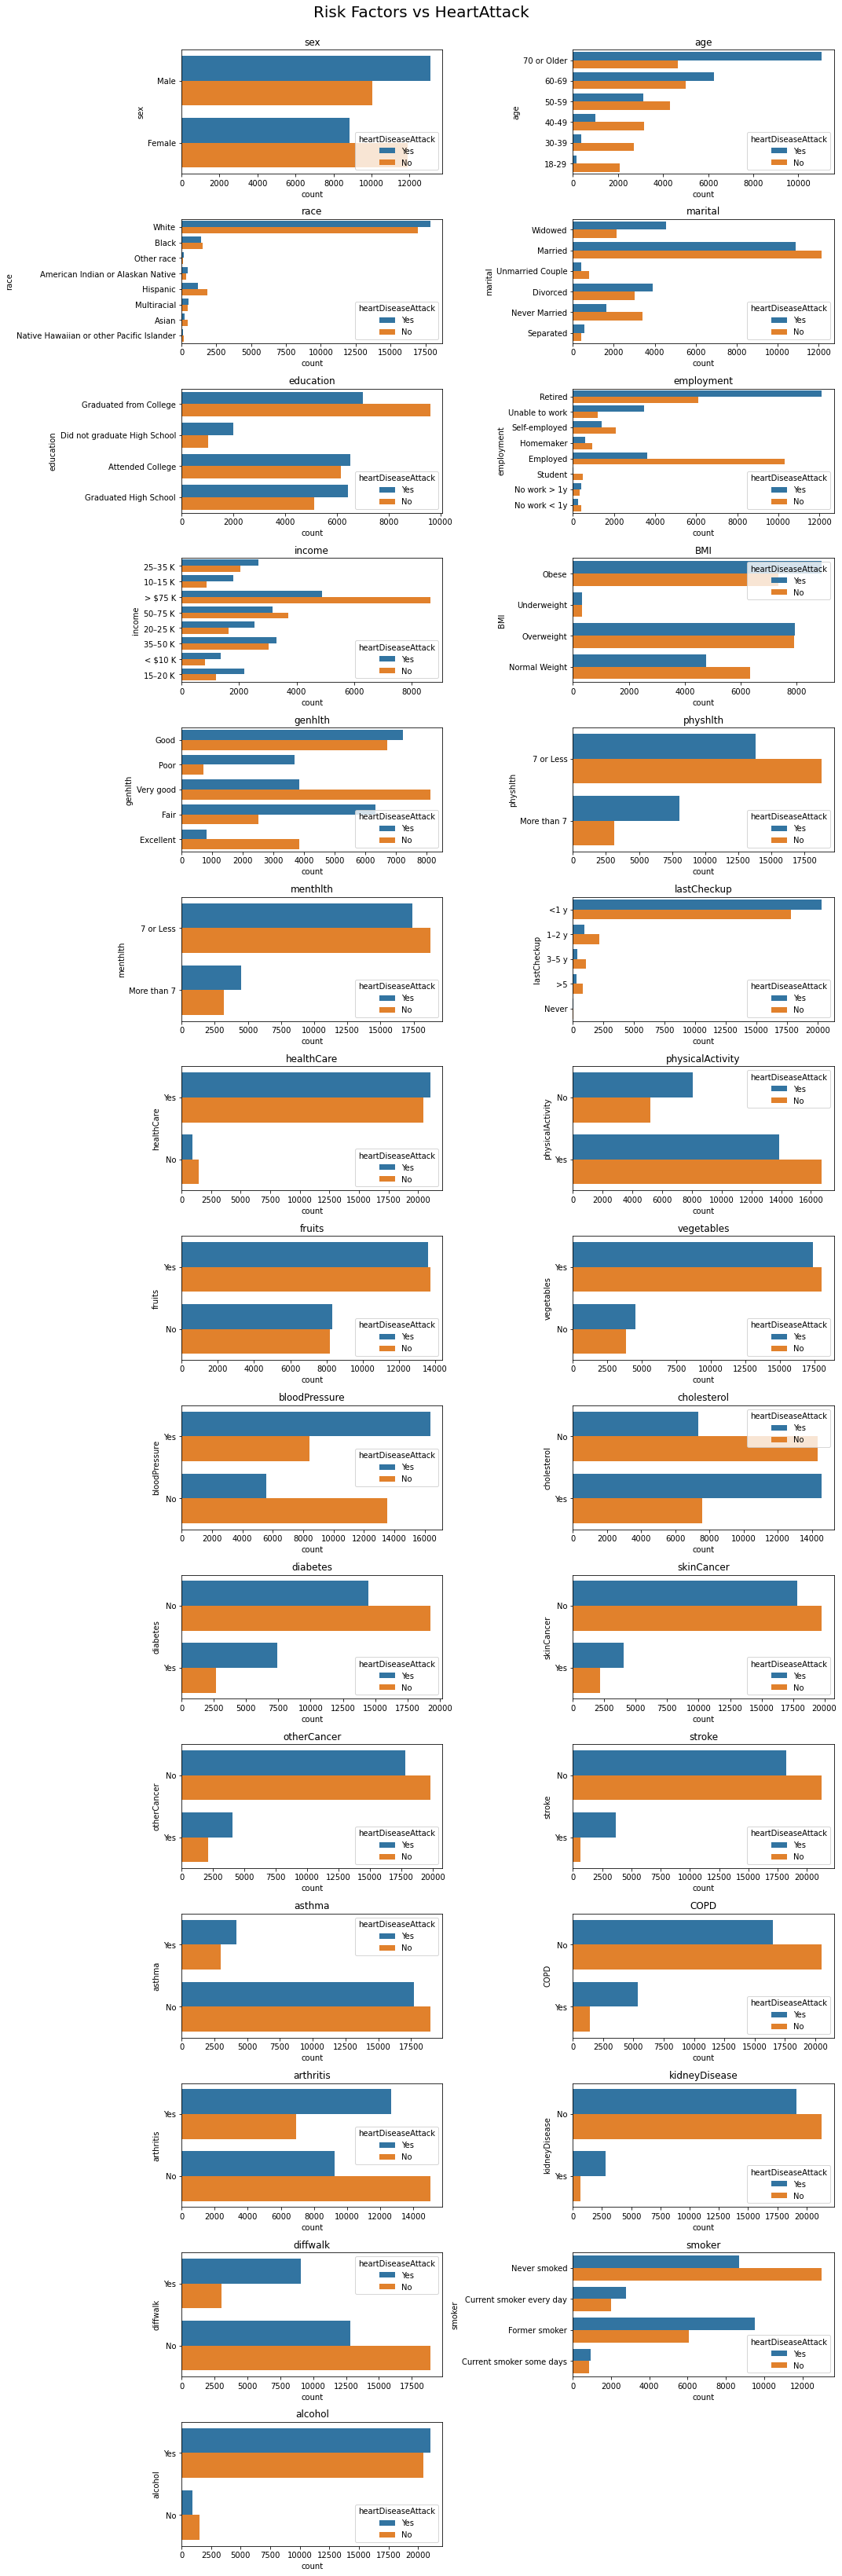

In [98]:
cols = list(df.columns)
plt.figure(figsize=(15,90))
for i,column in enumerate(cols[1:]):
    plt.subplot(len(cols), 2, i+1)
    plt.suptitle("Risk Factors vs HeartAttack", fontsize=20, x=0.5, y=1)
    sns.countplot(data=df, y=column, hue='heartDiseaseAttack')
    plt.title(f"{column}")
    plt.tight_layout()

The following conslusions can be made from visualising every risk factor against reporting Coronary Heart Disease:
* CHD was prevalent in people who were 70 or older
* More men reported to have been diagnosed with CHD
* Previously married respondents reported more cases of the disease
* Diabetes, High Blood Pressure and High Cholesterol levels show a xcorrelation with the diagnosis of CHD.
* Smokers and people with poor physical conditions reported more cases of CHD.
* The consumption of fruits and vegetables did not seem to impact the risk of Coronary heart disease.

<a id='machinelearning'></a>
## Machine Learning Algorithms

In [137]:
#creating another copy of the dataset to preprocess it for modelling
dm = df.copy()
dm.head()

,heartDiseaseAttack,sex,age,race,marital,education,employment,income,BMI,genhlth,physhlth,menthlth,lastCheckup,healthCare,physicalActivity,fruits,vegetables,bloodPressure,cholesterol,diabetes,skinCancer,otherCancer,stroke,asthma,COPD,arthritis,kidneyDisease,diffwalk,smoker,alcohol
0,Yes,Male,70 or Older,White,Widowed,Graduated from College,Retired,$25–$35 K,Obese,Good,7 or Less,7 or Less,<1 y,Yes,No,Yes,Yes,Yes,No,No,No,No,No,Yes,No,Yes,No,Yes,Never smoked,Yes
1,Yes,Female,60-69,White,Married,Did not graduate High School,Unable to work,$10–$15 K,Underweight,Poor,More than 7,7 or Less,<1 y,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Current smoker every day,Yes
2,Yes,Female,70 or Older,White,Married,Attended College,Self-employed,> $75 K,Obese,Very good,7 or Less,7 or Less,<1 y,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,No,No,Yes,No,No,Never smoked,Yes
3,Yes,Female,70 or Older,White,Widowed,Attended College,Unable to work,> $75 K,Overweight,Fair,7 or Less,7 or Less,<1 y,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,No,No,Yes,Yes,Never smoked,Yes
4,Yes,Male,70 or Older,White,Married,Attended College,Retired,$50–$75 K,Overweight,Good,7 or Less,7 or Less,<1 y,Yes,Yes,No,Yes,Yes,Yes,Yes,No,No,No,No,Yes,Yes,Yes,No,Former smoker,Yes


The dataset in this form would not work for machine learning models. From the assumptions of classification algorithms, variable attributes must be categorical or continous, so at this point I process the dataset further and encode attributes.

In [138]:
#Importing the necessary libraries to encode attributes
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

def dataTransform(data):
    '''Transforms the data into categorical values for ML modelling'''
    
    yesNo = ['heartDiseaseAttack','healthCare', 'physicalActivity', 'fruits', 'vegetables',
        'bloodPressure', 'cholesterol', 'diabetes', 'skinCancer', 'otherCancer',
        'stroke', 'asthma', 'COPD', 'arthritis', 'kidneyDisease', 'diffwalk', 'alcohol']
    
    labels = ['sex','physhlth','menthlth','education','age','race','marital',
          'employment','income','BMI','genhlth','lastCheckup','smoker']
    
    for col in yesNo:
        data[col] = data[col].apply(lambda x : 1.0 if x == 'Yes' else 0.0)

    for col in labels:
        data[col] = label_encoder.fit_transform(data[col]).astype('float')
        
    return data

model_data = dataTransform(dm)

In [140]:
model_data.head()

,heartDiseaseAttack,sex,age,race,marital,education,employment,income,BMI,genhlth,physhlth,menthlth,lastCheckup,healthCare,physicalActivity,fruits,vegetables,bloodPressure,cholesterol,diabetes,skinCancer,otherCancer,stroke,asthma,COPD,arthritis,kidneyDisease,diffwalk,smoker,alcohol
0,1.0,1.0,5.0,7.0,5.0,3.0,4.0,3.0,1.0,2.0,0.0,0.0,2.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,3.0,1.0
1,1.0,0.0,4.0,7.0,1.0,1.0,7.0,0.0,3.0,3.0,1.0,0.0,2.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
2,1.0,0.0,5.0,7.0,1.0,0.0,5.0,7.0,1.0,4.0,0.0,0.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,1.0
3,1.0,0.0,5.0,7.0,5.0,0.0,7.0,7.0,2.0,1.0,0.0,0.0,2.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,3.0,1.0
4,1.0,1.0,5.0,7.0,1.0,0.0,4.0,5.0,2.0,2.0,0.0,0.0,2.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,1.0


In [141]:
#Importing model selection & evaluation libraries from sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, plot_confusion_matrix, plot_roc_curve, classification_report

Train and test Split for validating the predictive performance of each model

In [142]:
X_train, X_test, y_train, y_test = train_test_split(model_data.drop('heartDiseaseAttack', axis=1),
                                                   model_data['heartDiseaseAttack'], test_size=0.2,
                                                   random_state=200)

Model evaluation function

In [177]:
def metrics(model):
    '''Takes in the the fitted model and evaluates it using the given metrics'''
    y_pred = model.predict(X_test)
    print(classification_report(y_test,y_pred))
    plot_confusion_matrix(model , X_test , y_test)
    plot_roc_curve(model , X_test , y_test)

### Logistic Regression

In [212]:
#Importing the sklearn logistic regression model
from sklearn.linear_model import LogisticRegression

#instantiating the model 
LogReg = LogisticRegression(solver='liblinear', C= 1, penalty='l2')

#fitting the model
LogReg.fit(X_train, y_train)

LogisticRegression(C=1, solver='liblinear')

              precision    recall  f1-score   support

         0.0       0.77      0.73      0.75      4408
         1.0       0.74      0.78      0.76      4357

    accuracy                           0.76      8765
   macro avg       0.76      0.76      0.76      8765
weighted avg       0.76      0.76      0.76      8765

CPU times: total: 406 ms
Wall time: 100 ms


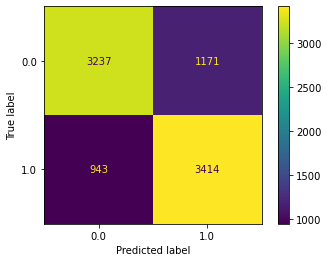

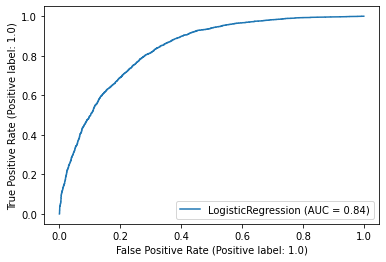

In [216]:
%%time
metrics(LogReg)

Tuning model parameters to optimize performance of the Logistic Regression model

In [196]:
from sklearn.model_selection import GridSearchCV

In [201]:
LogReg_params = [{'penalty':['l1', 'l2', 'elasticnet', 'none'], 'C': list(range(0,20)), 
                  'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}]

In [203]:
clf = GridSearchCV(LogReg, LogReg_params, cv = 2, scoring='accuracy')
clf.fit(X_train, y_train)
print(clf.best_params_)
print(clf.best_score_)

{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
0.7686910742084077


### Decision Tree

In [210]:
# Decision Tree model 
from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
tree = DecisionTreeClassifier(criterion = "gini", max_depth=8)

# fit the model 
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8)

              precision    recall  f1-score   support

         0.0       0.80      0.68      0.73      4408
         1.0       0.72      0.83      0.77      4357

    accuracy                           0.75      8765
   macro avg       0.76      0.75      0.75      8765
weighted avg       0.76      0.75      0.75      8765

CPU times: total: 78.1 ms
Wall time: 79 ms


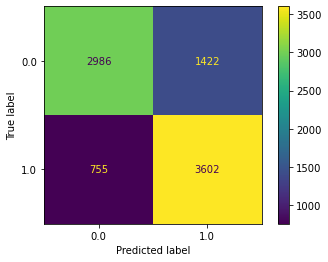

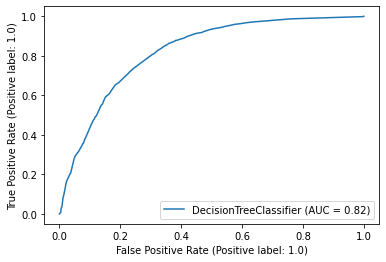

In [211]:
%%time
metrics(tree)

Tuning model parameters to optimize performance of the tree

In [207]:
# tree_params = [{'criterion':["gini", "entropy"], 'max_depth': list(range(0,20)), 
#                   'splitter': ["best", "random"]}]

In [208]:
# clf = GridSearchCV(tree, tree_params, cv = 2, scoring='accuracy')
# clf.fit(X_train, y_train)
# print(clf.best_params_)
# print(clf.best_score_)

{'criterion': 'gini', 'max_depth': 8, 'splitter': 'best'}
0.7514333846039161


### K-Nearest Neighbor

In [214]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model.fit(X_train , y_train)

KNeighborsClassifier()

              precision    recall  f1-score   support

         0.0       0.73      0.72      0.72      4408
         1.0       0.72      0.73      0.73      4357

    accuracy                           0.72      8765
   macro avg       0.72      0.72      0.72      8765
weighted avg       0.72      0.72      0.72      8765

CPU times: total: 26.5 s
Wall time: 17 s


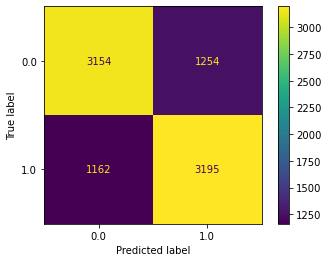

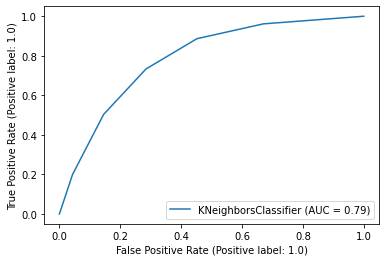

In [217]:
%%time
metrics(knn_model)

### Feature Importance of variables for the Decision Tree Classifier

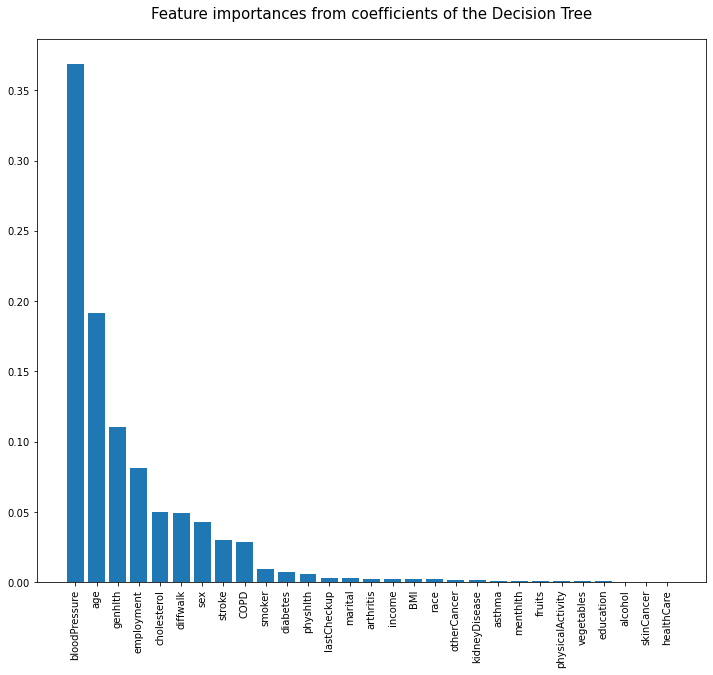

In [223]:
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': tree.feature_importances_
})

importances = importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12,10))
plt.bar(x=importances['Attribute'], height=importances['Importance'])
plt.title('Feature importances from coefficients of the Decision Tree', size=15, pad=20)
plt.xticks(rotation='vertical')
plt.show()

<a id='conclusions'></a>
## Conclusions

Common risk factors of Coronary heart disease showed correlations with the respondents and from plotting the feaature importance of the proposed Decision Tree model. These risk factors were responsible for the models outcome.